In [4]:
import pandas as pd
import plotnine as pn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [5]:
df = pd.read_csv("Sample - Superstore.csv", encoding_errors='ignore')

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Exploratory Analysis


## Order Date

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [8]:
df["Order Date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

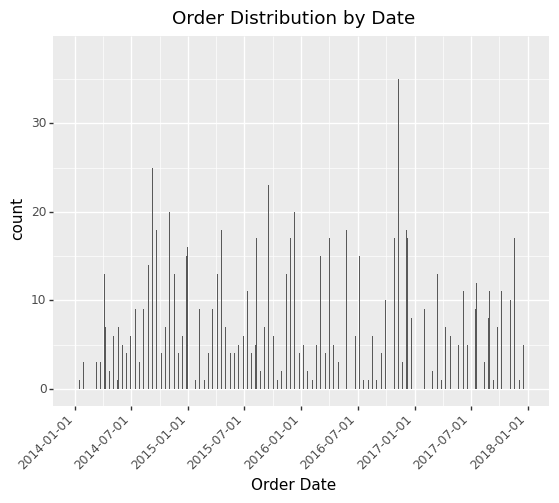

<ggplot: (8774985515257)>

In [9]:
(
    pn.ggplot(df, pn.aes(x="Order Date"))
    + pn.geom_histogram(binwidth=0.25)
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
    + pn.ggtitle("Order Distribution by Date")
)

### Check Seasonal Distribution


In [10]:
df["year"] = pd.DatetimeIndex(df["Order Date"]).year
df["month"] = pd.Categorical(pd.DatetimeIndex(df["Order Date"]).month)
df["month_num"] = pd.DatetimeIndex(df["Order Date"]).month
df["dayofweek"] = pd.Categorical(pd.DatetimeIndex(df["Order Date"]).dayofweek)
df["dayofweek_num"] = pd.DatetimeIndex(df["Order Date"]).dayofweek

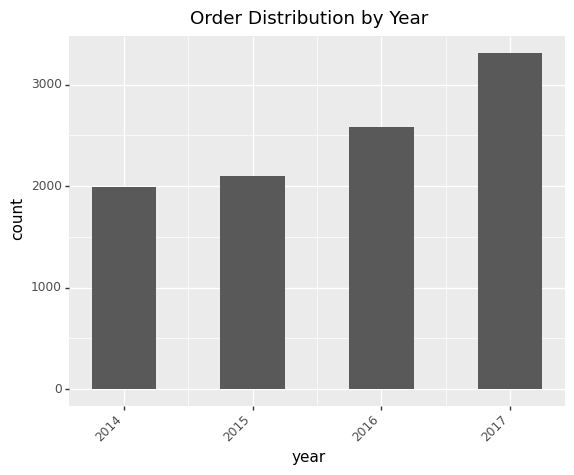

<ggplot: (8774985497237)>

In [11]:
(
    pn.ggplot(df, pn.aes(x="year"))
    + pn.geom_histogram(binwidth=0.5)
    + pn.ggtitle("Order Distribution by Year")
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
)

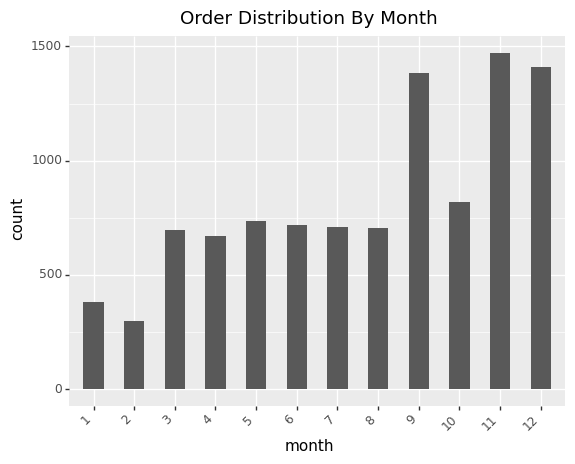

<ggplot: (8774982976933)>

In [12]:
(
    pn.ggplot(df, pn.aes(x="month"))
    + pn.geom_histogram(binwidth=0.5)
    + pn.ggtitle("Order Distribution By Month")
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
)

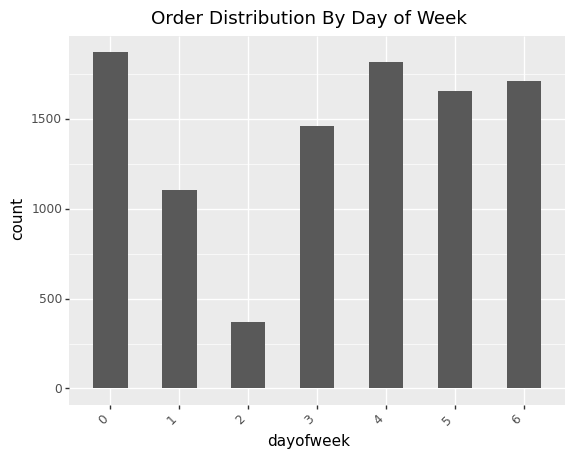

<ggplot: (8774984523173)>

In [13]:
(
    pn.ggplot(df, pn.aes(x="dayofweek"))
    + pn.geom_histogram(binwidth=0.5)
    + pn.ggtitle("Order Distribution By Day of Week")
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
)

## Ship Date

In [14]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [15]:
df["Order to Ship Time"] = df["Ship Date"] - df["Order Date"]

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 38'. Pick better value with 'binwidth'.
/usr/local/lib/python3.7/dist-packages/plotnine/positions/position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals


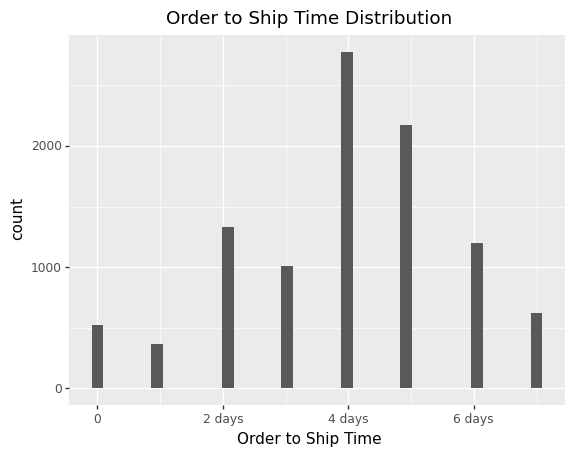

<ggplot: (8774982987201)>

In [16]:
(
    pn.ggplot(df, pn.aes(x="Order to Ship Time"))
    + pn.geom_histogram()
    + pn.ggtitle("Order to Ship Time Distribution")
)

## Ship Mode

In [17]:
df["Ship Mode"].describe()

count               9994
unique                 4
top       Standard Class
freq                5968
Name: Ship Mode, dtype: object

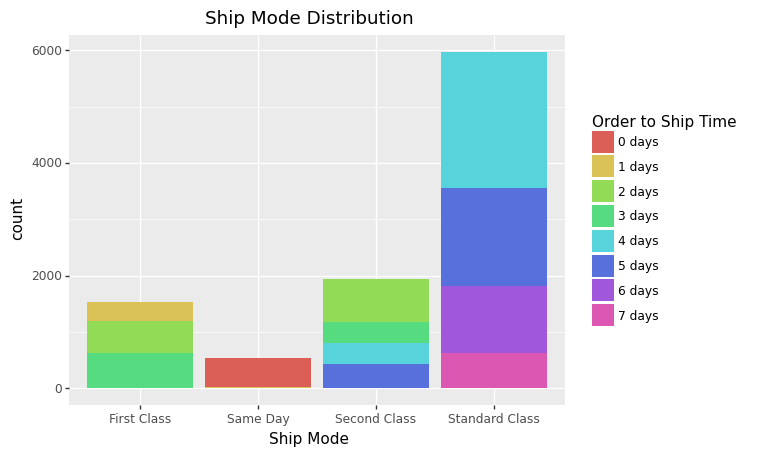

<ggplot: (8774982657121)>

In [18]:
df["Order to Ship Time cat"] = pd.Categorical((df["Order to Ship Time"] / np.timedelta64(1, 'D'))
.map(lambda x : f"{int(x)} days"))
(
    pn.ggplot(df)
    + pn.aes(x="Ship Mode", fill="Order to Ship Time cat")
    + pn.geom_bar()
    + pn.labs(fill="Order to Ship Time")
    + pn.ggtitle("Ship Mode Distribution")
)

In [19]:
ship_mode_nums = {"First Class":1, "Same Day":0, "Second Class":2, "Standard Class":3}
ship_mode_num = df["Ship Mode"].replace(ship_mode_nums)
df["ship_mode_num"] = ship_mode_num

## Segment


In [20]:
df["Segment"].describe()

count         9994
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 22'. Pick better value with 'binwidth'.


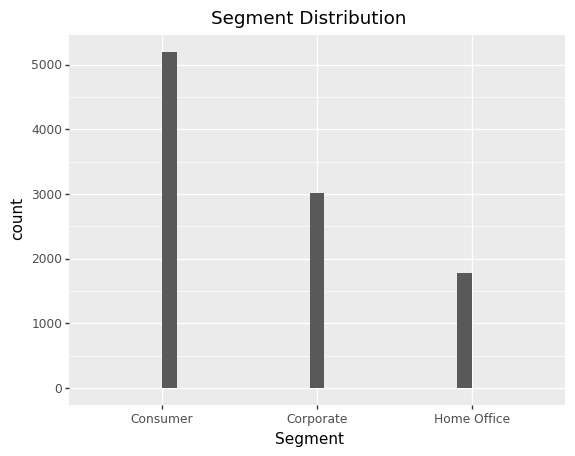

<ggplot: (8774984654085)>

In [21]:
(
    pn.ggplot(df, pn.aes(x="Segment"))
    + pn.geom_histogram()
    + pn.ggtitle("Segment Distribution")
)

Give `Segment` a one-hot encoding to make correlation easier to check

In [22]:
df["Segment_num"], uniques = pd.factorize(df["Segment"])

## Location

In [23]:
df[["Country", "City", "State", "Postal Code", "Region"]].sample(10)

,Country,City,State,Postal Code,Region
7488,United States,Dover,New Hampshire,3820,East
8921,United States,Coral Gables,Florida,33134,South
7926,United States,New York City,New York,10035,East
8833,United States,Sandy Springs,Georgia,30328,South
9121,United States,Los Angeles,California,90032,West
9543,United States,Houston,Texas,77095,Central
1869,United States,Seattle,Washington,98103,West
5768,United States,Leominster,Massachusetts,1453,East
5758,United States,Hialeah,Florida,33012,South
87,United States,Rochester,Minnesota,55901,Central


In [24]:
df["Country"].describe()

count              9994
unique                1
top       United States
freq               9994
Name: Country, dtype: object

There is only 1 country (United States), so it contains no useful information

In [25]:
df["State"].describe()

count           9994
unique            49
top       California
freq            2001
Name: State, dtype: object

In [26]:
df["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [27]:
state_list = df["State"].value_counts().sort_values(ascending=True).index.tolist()
df["State_cat"] = pd.Categorical(df["State"], categories=state_list)

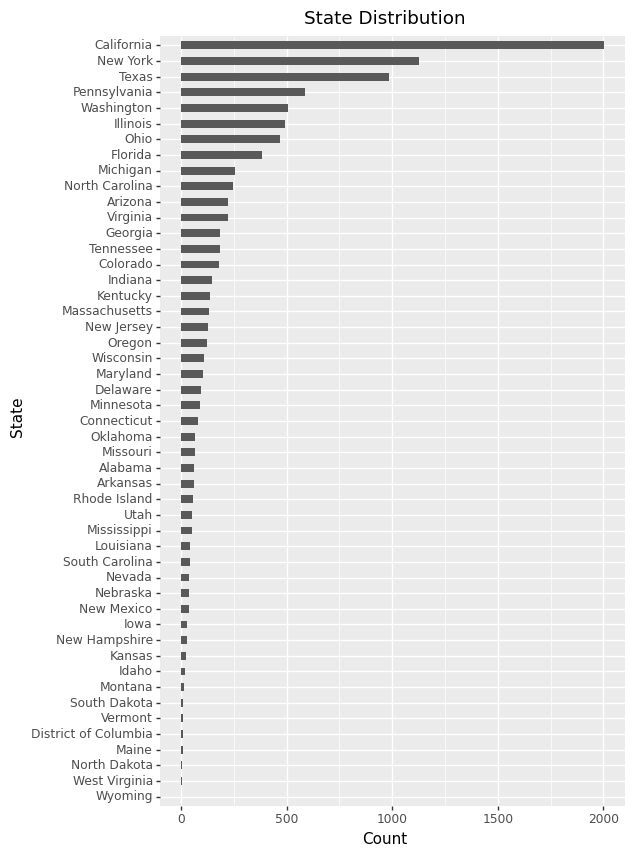

<ggplot: (8774985258501)>

In [28]:

(
    pn.ggplot(df)
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.theme(figure_size=(6, 10))
    + pn.labs(x="State", y="Count", title="State Distribution")
)

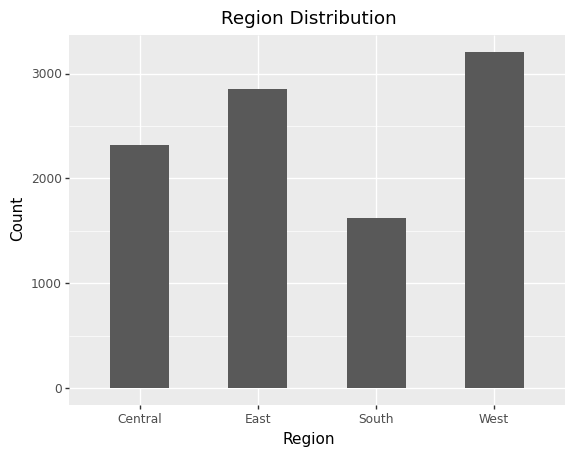

<ggplot: (8774984665165)>

In [29]:
(
    pn.ggplot(df)
    + pn.aes(x="Region")
    + pn.geom_histogram(binwidth=0.5)
    + pn.labs(x="Region", y="Count", title="Region Distribution")
)

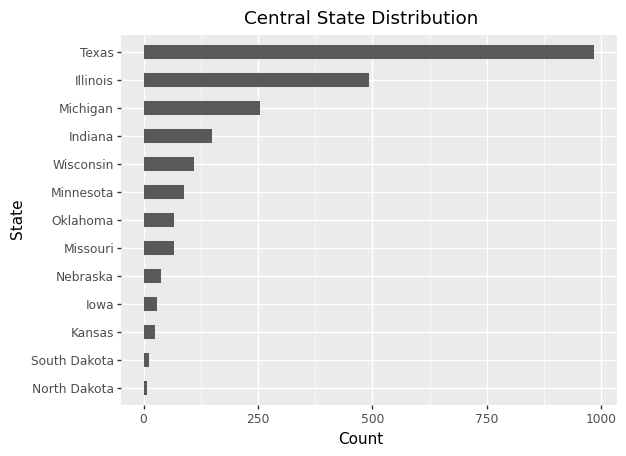

<ggplot: (8774984774141)>

In [30]:
(
    pn.ggplot(df.loc[df["Region"]=="Central"])
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="State", y="Count", title="Central State Distribution")
)

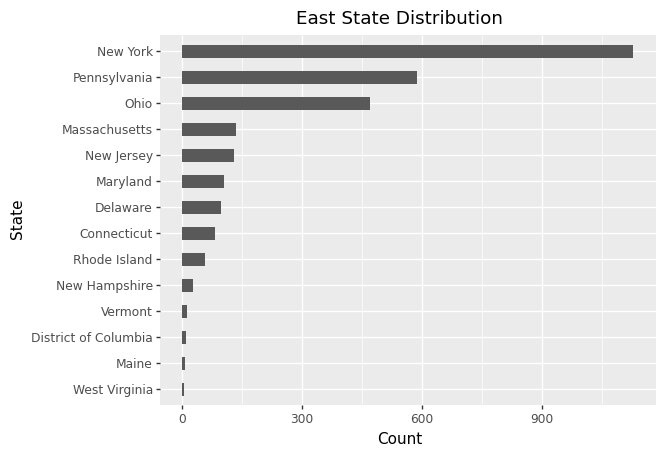

<ggplot: (8774982700813)>

In [31]:
(
    pn.ggplot(df.loc[df["Region"]=="East"])
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="State", y="Count", title="East State Distribution")
)

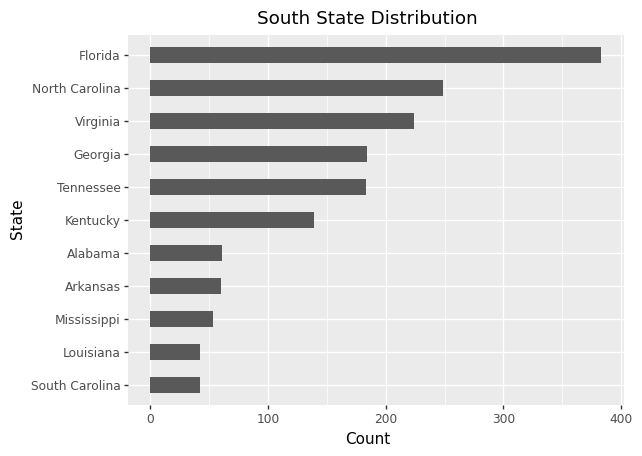

<ggplot: (8774984751341)>

In [32]:
(
    pn.ggplot(df.loc[df["Region"]=="South"])
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="State", y="Count", title="South State Distribution")
)

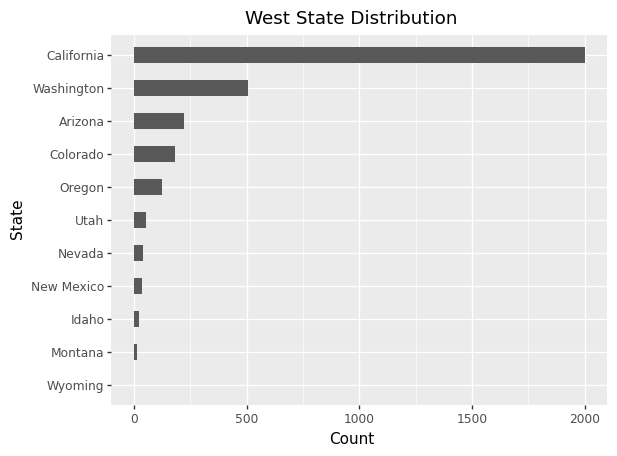

<ggplot: (8774984925473)>

In [33]:
(
    pn.ggplot(df.loc[df["Region"]=="West"])
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="State", y="Count", title="West State Distribution")
)

## Product Category, Sub-Category, and Name

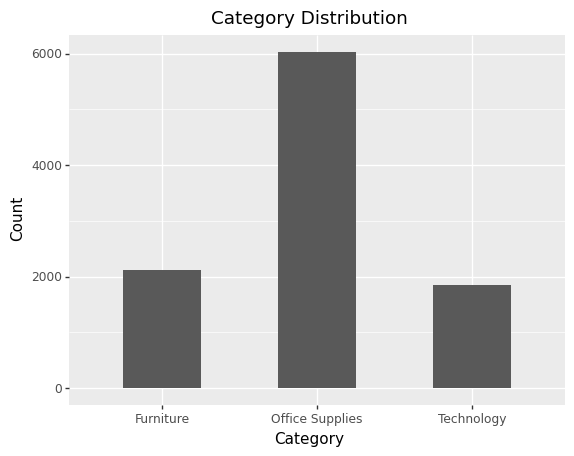

<ggplot: (8774984747965)>

In [34]:
(
    pn.ggplot(df)
    + pn.aes(x="Category")
    + pn.geom_histogram(binwidth=0.5)
    + pn.labs(x="Category", y="Count", title="Category Distribution")
)

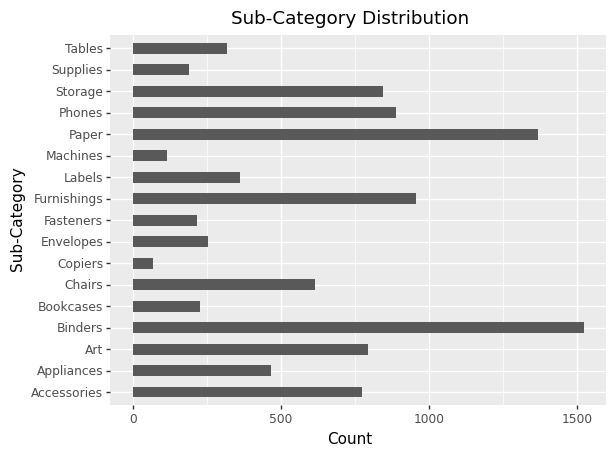

<ggplot: (8774985027961)>

In [35]:
(
    pn.ggplot(df)
    + pn.aes(x="Sub-Category")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="Sub-Category", y="Count", title="Sub-Category Distribution")
)

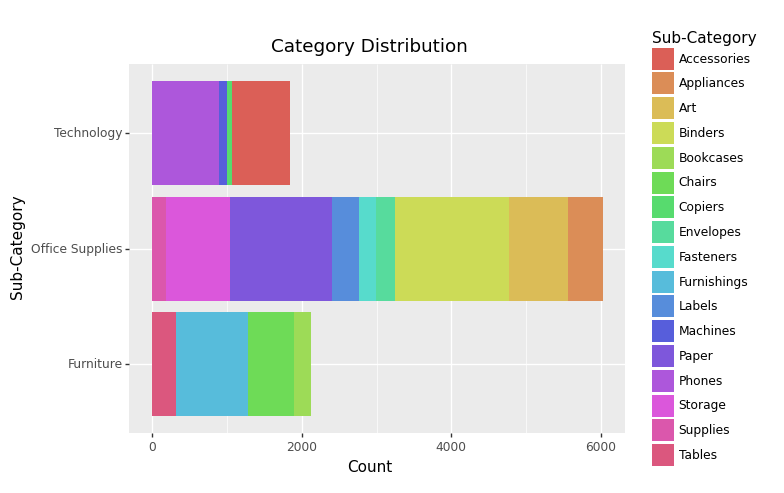

<ggplot: (8774984523073)>

In [36]:
(
    pn.ggplot(df)
    + pn.aes(x="Category", fill="Sub-Category")
    + pn.geom_bar()
    + pn.coord_flip()
    + pn.labs(x="Sub-Category", y="Count", title="Category Distribution")
)

In [37]:
df["Product Name"].sample(10)

9929                   Canon PC1060 Personal Laser Copier
2337                                           Xerox 1994
1186                                            Xerox 220
6071      Fellowes Stor/Drawer Steel Plus Storage Drawers
3434                           Zipper Ring Binder Pockets
4027                                        Pyle PMP37LED
3150    Plantronics Savi W720 Multi-Device Wireless He...
9913                                            Avery 503
9488             Wilson Electronics DB Pro Signal Booster
1995    3.6 Cubic Foot Counter Height Office Refrigerator
Name: Product Name, dtype: object

Give `Categories` and `Sub-Categories` a simple encoding to make correlation easier to check

In [38]:
df["Category_num"], uniques = pd.factorize(df["Category"])
df["Sub-Category_num"], uniques = pd.factorize(df["Sub-Category"])

## Sales, Quantity, Discount, and Profit

In [39]:
df[["Sales", "Quantity", "Discount", "Profit"]].sample(10)

,Sales,Quantity,Discount,Profit
8132,535.410,3,0.0,160.6230
6103,59.970,3,0.0,20.3898
9365,11.560,2,0.0,5.6644
5346,10.896,3,0.2,3.9498
4529,2.296,2,0.8,-3.9032
910,1928.780,7,0.0,829.3754
438,31.872,8,0.2,11.5536
9310,146.688,8,0.2,45.8400
6302,195.960,5,0.2,19.5960
5180,75.840,2,0.0,29.5776


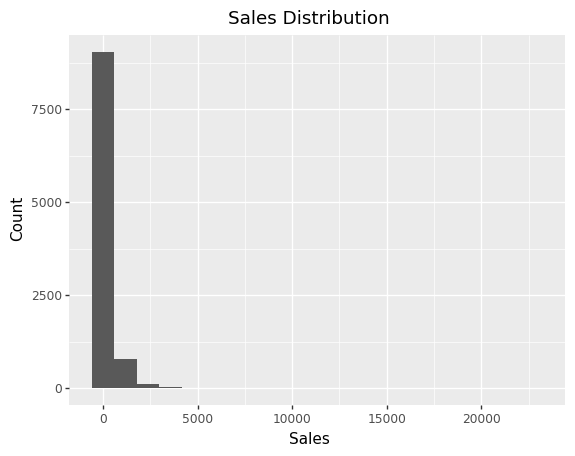

<ggplot: (8774984613001)>

In [40]:
(
    pn.ggplot(df)
    + pn.aes(x="Sales")
    + pn.geom_histogram(bins=20)
    + pn.labs(x="Sales", y="Count", title="Sales Distribution")
)

Sales numbers above 5000 are outliers, so it is easier to check values under 5000 only


In [41]:
df.loc[df["Sales"]>5000]["Row ID"].count()

19

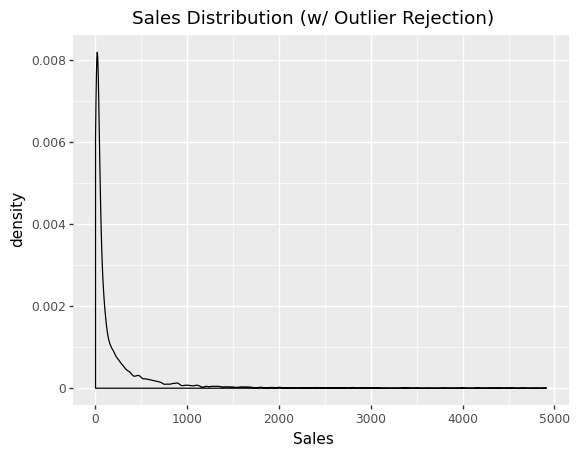

<ggplot: (8774984800753)>

In [42]:
(
    pn.ggplot(df.loc[df["Sales"]<5000])
    + pn.aes(x="Sales")
    + pn.geom_density()
    + pn.labs(x="Sales", title="Sales Distribution (w/ Outlier Rejection)")
)

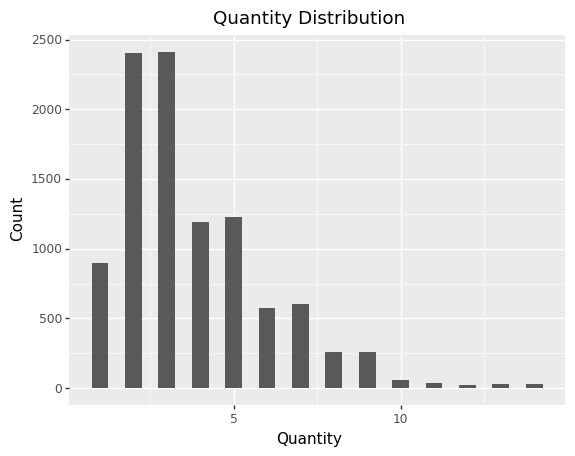

<ggplot: (8774984429289)>

In [43]:
(
    pn.ggplot(df)
    + pn.aes(x="Quantity")
    + pn.geom_histogram(binwidth=0.5)
    + pn.labs(x="Quantity", y="Count", title="Quantity Distribution")
)

In [44]:
df["Discount"].sort_values().value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

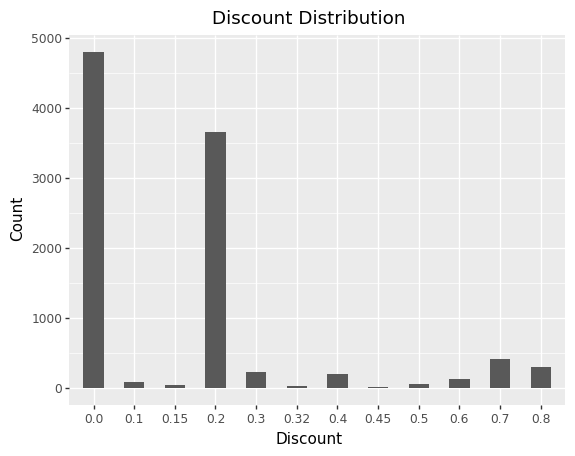

<ggplot: (8774984838417)>

In [45]:
df["Discount_cat"] = pd.Categorical(df["Discount"])
(
    pn.ggplot(df)
    + pn.aes(x="Discount_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.labs(x="Discount", y="Count", title="Discount Distribution")
)

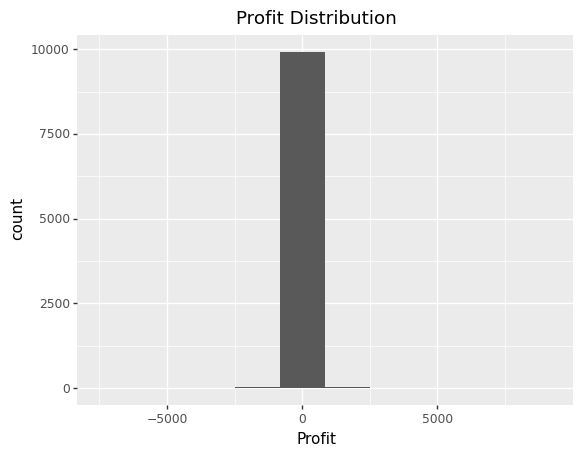

<ggplot: (8774984308821)>

In [46]:
(
    pn.ggplot(df)
    + pn.aes(x="Profit")
    + pn.geom_histogram(bins=10)
    + pn.labs(x="Profit", title="Profit Distribution")
)

Check for outliers:

In [47]:
df.loc[(df["Profit"] < -250) | (df["Profit"] > 250)]["Row ID"].count() / df["Row ID"].count()

0.044326595957574544

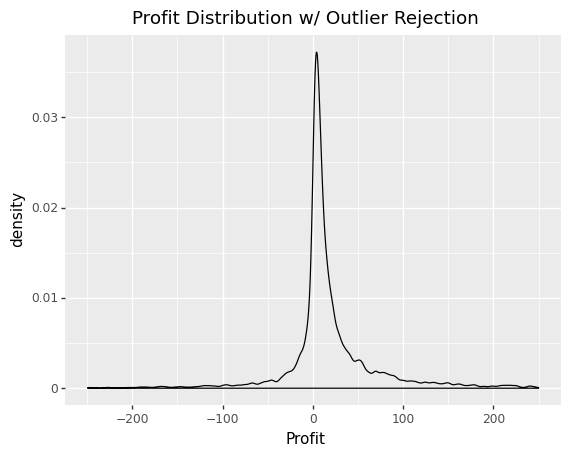

<ggplot: (8774984393717)>

In [48]:
(
    pn.ggplot(df.loc[(df["Profit"] > -250) & (df["Profit"] < 250)])
    + pn.aes(x="Profit")
    + pn.geom_density()
    + pn.labs(x="Profit", title="Profit Distribution w/ Outlier Rejection")
)

## Correlation Checks

In [49]:
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,year,month_num,dayofweek_num,ship_mode_num,Segment_num,Category_num,Sub-Category_num
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497,0.015430,-0.018732,-0.039364,0.010468,0.014058,-0.004565,0.001399
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,0.004299,0.026234,0.002269,-0.011337,-0.010772,-0.002331,0.004707
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064,-0.009679,-0.000625,-0.009343,-0.003224,0.010866,0.040077,-0.012384
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253,-0.005810,0.023355,-0.002099,0.024864,0.008130,-0.003619,-0.003298
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487,-0.002662,-0.004935,0.015341,0.007337,-0.016679,-0.062897,-0.027811
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.004670,-0.000502,0.000200,-0.005767,0.013355,0.091506,0.080734
year,0.015430,0.004299,-0.009679,-0.005810,-0.002662,0.004670,1.000000,-0.020183,0.052432,-0.040434,0.040803,0.005219,0.002217
month_num,-0.018732,0.026234,-0.000625,0.023355,-0.004935,-0.000502,-0.020183,1.000000,0.010870,-0.016907,-0.024712,-0.012977,0.000616
dayofweek_num,-0.039364,0.002269,-0.009343,-0.002099,0.015341,0.000200,0.052432,0.010870,1.000000,-0.045786,0.008477,0.014266,0.009985
ship_mode_num,0.010468,-0.011337,-0.003224,0.024864,0.007337,-0.005767,-0.040434,-0.016907,-0.045786,1.000000,0.003023,-0.001085,-0.004128


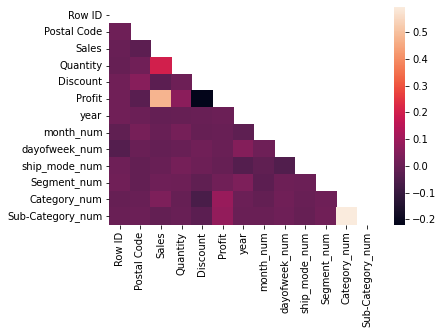

In [50]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=False, mask=mask)

Pairs with significant correlation:
* Sales, Profit
* Sales, Quantity
* Discount, Profit
* Category_num, Sub-Category_num *(this correlatoin isn't relevant: every subcategory implies a particular category, which makes them highly correlated)*

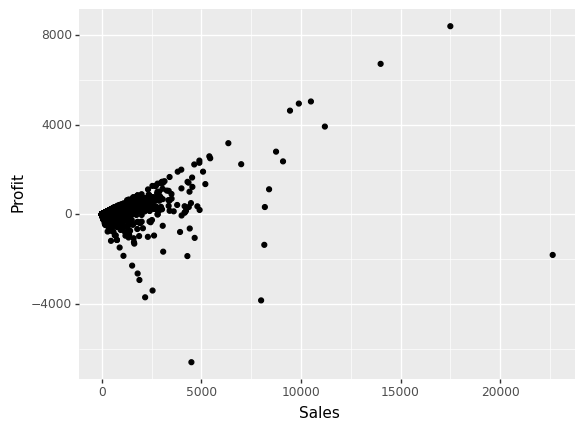

<ggplot: (8774984218341)>

In [51]:
(
    pn.ggplot(df)
    + pn.aes(x="Sales", y="Profit")
    + pn.geom_point()
)

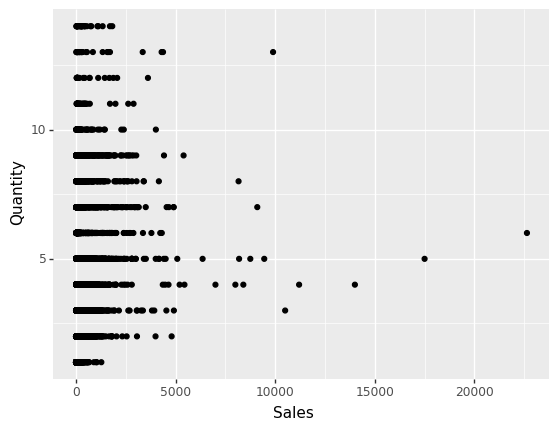

<ggplot: (8774984223141)>

In [52]:
(
    pn.ggplot(df)
    + pn.aes(x="Sales", y="Quantity")
    + pn.geom_point()
)

# Highlights

## Correlations
This heatmap shows the correlations of each pair of columns in the dataset. Some columns have been encoded to produce numerical data so that correlation can be calculated (these are marked with `_num`). This map allows you to quickly see pairs of columns that might have interesting correlations. The following columns have relatively high correlation, so I generated a pair plot to see more detail: 
* Quantity x Sales
* Profit x Sales
* Profit x Discount
* *Category_num x Sub-Category_num seems to have a high correlation, but these are obviously correlated because every sub-category is in a specific category, so this is not interesting.*

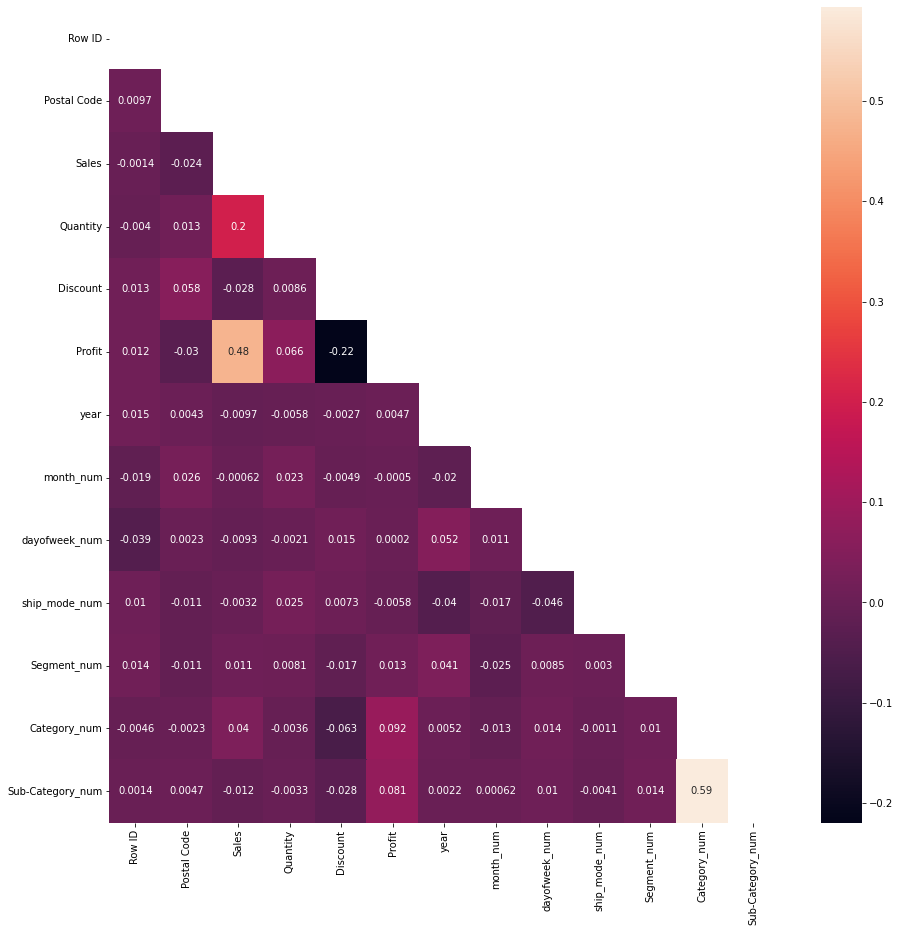

In [68]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, mask=mask)

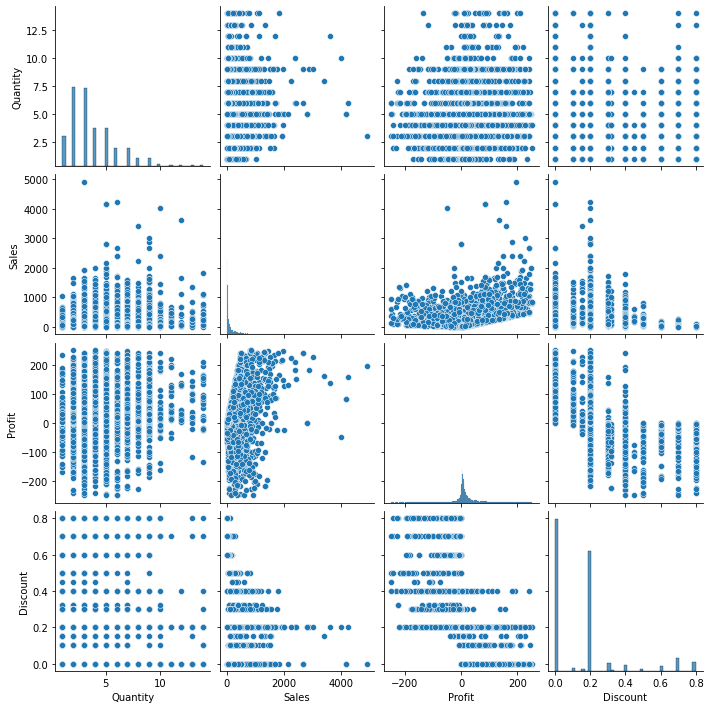

In [70]:
data = df.loc[(df["Profit"] > -250) & (df["Profit"] < 250) & (df["Sales"] < 5000)]
sns.pairplot(data[["Quantity", "Sales", "Profit", "Discount"]])

This set of scatterplots suggests interesting correlations between Discount, Sales, and Profit, which I explore in the next section

## Discounts, Sales, and Profits

As can be seen in the following graph, profit is inversely correlated with discount. This seems to imply that setting a high discount (particularly above 0.5) is generally a bad idea because it will decrease profits. The next graph involving sales, however, implies that the causation goes the opposite direction. 

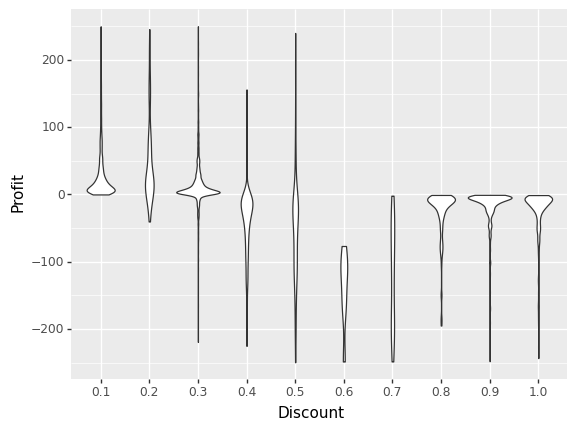

<ggplot: (8774965344741)>

In [71]:
df["discount_binned"] = pd.cut(df["Discount"], 10, labels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
(
    pn.ggplot(df.loc[(df["Profit"] > -250) & (df["Profit"] < 250)])
    + pn.aes(x="discount_binned", y="Profit", color="Sales")
    + pn.geom_violin()
    # + pn.geom_point()
    + pn.labs(x="Discount", y="Profit")
)

This plot illustrates that sales generally decrease as discount increases, implying that highly discounted items lose money not because to many people buy them, it is because too few people buy them.

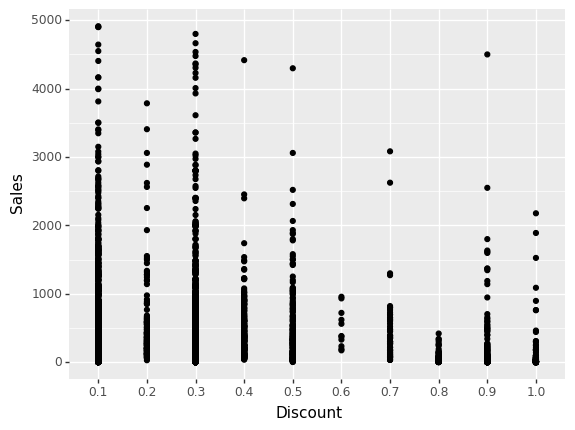

<ggplot: (8774964446825)>

In [75]:
df["discount_binned"] = pd.cut(df["Discount"], 10, labels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
(
    pn.ggplot(df.loc[df["Sales"] < 5000])
    + pn.aes(x="discount_binned", y="Sales")
    + pn.geom_point()
    + pn.labs(x="Discount", y="Sales")
)

# Save Processed CSV for Modeling

In [55]:
df.to_csv("./superstore_processed.csv")